<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import sympy as sp
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Домашнее задание

Математический анализ
69 баллов

**Задача 1** (14 баллов)

Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

Распишите подробное решение.

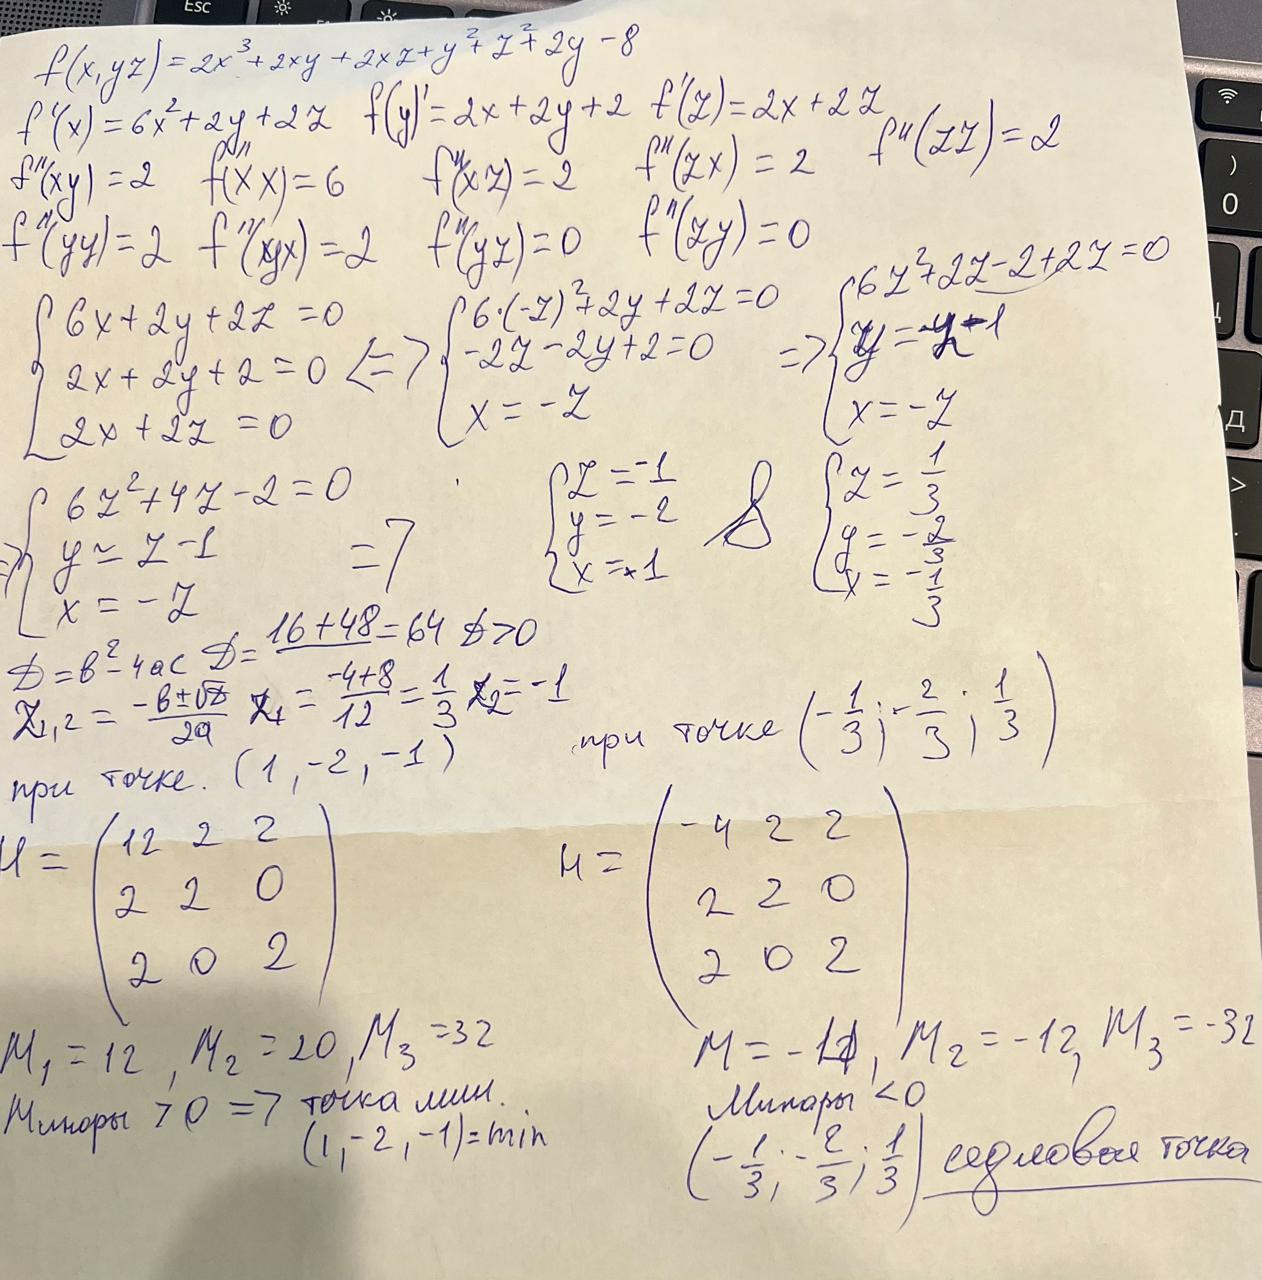

In [6]:
# Обозначим переменные
x,y,z = sp.symbols('x, y, z')
# Введем функцию
f = 2*x**3 + 2*x*y + 2*x*z + y**2 + z**2 + 2*y - 8

# Находим первые частные производные по трем переменным
f_dx = f.diff(x)
print(f'Частная производная по х: {f_dx}')
f_dy = f.diff(y)
print(f'Частная производная по y: {f_dy}')
f_dz = f.diff(z)
print(f'Частная производная по z: {f_dz}')

# Приравниваем функции частных производных к 0 и решаем как систему уравнений 
points = sp.solve([f_dx, f_dy, f_dz], [x, y, z])
print(f'Точки экстремума: {points}')

# Для определения, являются точки точками максимума, минимума или седловыми,
# найдем частные производные второго порядка
f_dxdx = f_dx.diff(x)
print(f'Производная dxdx: {f_dxdx}')
f_dydy = f_dy.diff(y)
print(f'Производная dydy: {f_dydy}')
f_dzdz = f_dz.diff(z)
print(f'Производная dzdz: {f_dzdz}')
f_dxdy = f_dx.diff(y)
print(f'Производная dxdy: {f_dxdy}')
f_dxdz = f_dx.diff(z)
print(f'Производная dxdz: {f_dxdz}')
f_dydz = f_dy.diff(z)
print(f'Производная dxdx: {f_dydz}')

Частная производная по х: 6*x**2 + 2*y + 2*z
Частная производная по y: 2*x + 2*y + 2
Частная производная по z: 2*x + 2*z
Точки экстремума: [(-1/3, -2/3, 1/3), (1, -2, -1)]
Производная dxdx: 12*x
Производная dydy: 2
Производная dzdz: 2
Производная dxdy: 2
Производная dxdz: 2
Производная dxdx: 0


In [7]:
mat = np.mat("-4 2 2;2 2 0;2 0 2") 
  
# Original matrix 
print(mat) 
print("") 
evalue, evect = np.linalg.eig(mat) 
  
# Eigenvalues of the said matrix" 
print(evalue) 
print("") 
  
# Eigenvectors of the said matrix 
print(evect) 

[[-4  2  2]
 [ 2  2  0]
 [ 2  0  2]]

[-5.12310563  3.12310563  2.        ]

[[-9.29410263e-01  3.69048184e-01 -1.57009246e-16]
 [ 2.60956474e-01  6.57192300e-01 -7.07106781e-01]
 [ 2.60956474e-01  6.57192300e-01  7.07106781e-01]]


In [8]:
# Определяем функцию, возвращающую матрицу Гессе для исходной функции
# Так как в производных второго порядка осталась только переменная х, 
# ее значение будет единственным аргументом функции
def hesse(x_val):
    return np.array([
      [12 * x_val, 2, 2],
      [2, 2, 0],
      [2, 0, 2]
   ], dtype=float)

# Проверяем найденные точки экстремумов
for point in points:
    # Значение переменной х - это первое число в кортеже
    x_val = point[0]
    # Рассчитываем матрицу Гессе для этого значения х
    Hesse = hesse(x_val)
    # Рассчитываем определитель матрицы Гессе
    Hesse_det = np.linalg.det(Hesse)
    # Находим собственные числа
    eig = np.linalg.eigvals(Hesse)
    
    # На основании знака определителя и собственных чисел, определяем тип экстремума
    if Hesse_det > 0 and eig.all() > 0:
        print("Минимум в точке", point)
    elif Hesse_det > 0 and eig.all() < 0:
        print("Максимум в точке", point)
    elif Hesse_det < 0:
        print("Седловая точка в точке", point)
    else:
        print("Точка", point, "не является точкой экстремума")

Седловая точка в точке (-1/3, -2/3, 1/3)
Минимум в точке (1, -2, -1)


**Задача 2** (25 баллов)

Найдите условные экстремумы функции:

$$
f(x, y)=4 x+8 y, y^2-2 x y+5=0
$$

Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

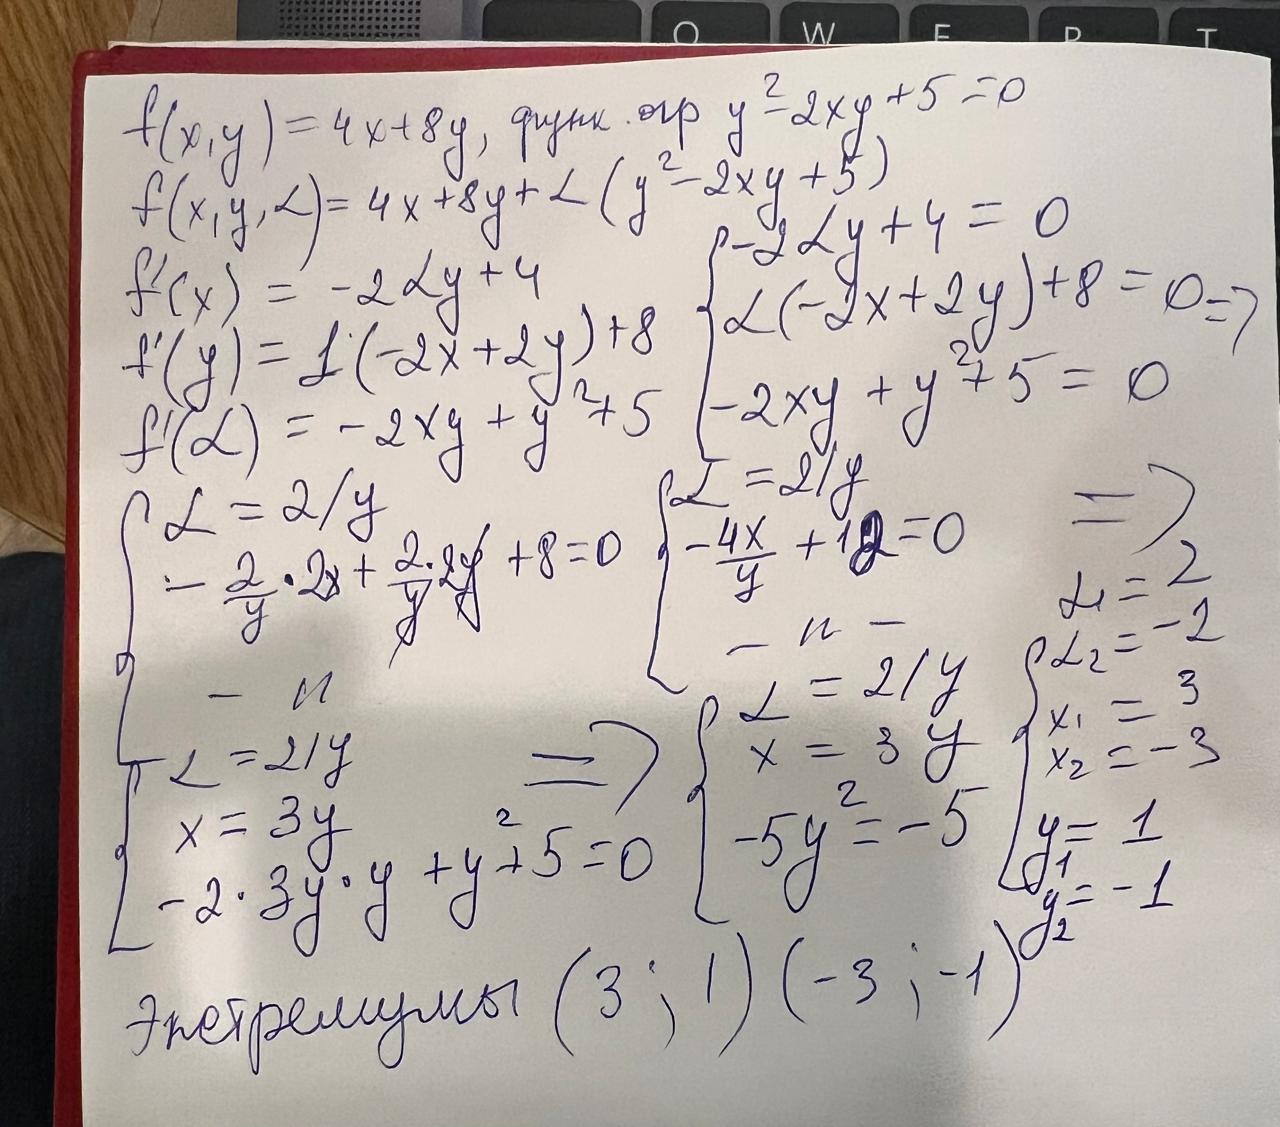

In [11]:
# Программное решение
# Обозначим переменные
x,y,l = sp.symbols('x, y, l')
# Введем функцию
f = 4*x + 8*y
# Введем функцию ограничений
f_c = y**2 - 2*x*y + 5
# Составим функцию Лагранжа
L = f + l*f_c

# Находим первые частные производные по трем переменным
L_dx = L.diff(x)
L_dy = L.diff(y)
L_dl = L.diff(l)
print(L_dx)
print(L_dy)
print(L_dl)

# Приравниваем функции частных производных к 0 и решаем как систему уравнений 
points = sp.solve([L_dx, L_dy, L_dl], [x, y, l])
print(f'Точки условного экстремума: ({points[0][0]},{points[0][1]}) и ({points[1][0]},{points[1][1]})')

-2*l*y + 4
l*(-2*x + 2*y) + 8
-2*x*y + y**2 + 5
Точки условного экстремума: (-3,-1) и (3,1)


**Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

In [15]:
# чтение данных из файла в датафрейм
data = pd.read_csv('Student_Performance.txt')
# удаляем не указанный в задании столбец
data.drop('Extracurricular Activities', axis=1, inplace=True)
# инициализируем переменную с количеством наблюдений
n = data.shape[0]
# проанализируем датафрейм
display(data.describe())
display(data.info())

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


None

In [53]:
# инициализируем переменные с признаками и целевым вектором
X = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values.reshape(n,4)
y = data['Performance Index'].values.reshape(n,1)

# стандартизируем признаки
scaler = StandardScaler()
X = scaler.fit_transform(X)
# добавляем интерцепт
X = np.append(np.ones((n,1)), X, axis = 1)
# инициализируем начальный вектор коэффициентов нолями
w = np.zeros((5,1))
# реализуем функцию потерь
def cost_function(X, y , par):
    y_pred = X@par
    error = (y_pred - y)**2
    cost = 1/(n)*np.sum(error)
    return cost
# реализуем функцию градиентного спуска
def grad_d(X,y, par, alpha, iterations, eps=0.001):
    costs = []
    for i in range(iterations):
        y_pred = X@par
        der = np.dot (X.transpose(), (y_pred - y))/ n
        par -= alpha * der
        costs.append(cost_function(X,y, par))
        if np.linalg.norm(der) < eps:
            break
    return par, costs
# вычисляем коэффициенты регрессии
w, costs = grad_d(X,y, w, 0.00005, 500000)
print(w.round(3))

[[55.224]
 [ 7.388]
 [17.664]
 [ 0.808]
 [ 0.56 ]]


In [54]:
# считаем предсказанные параметры с этими коэффициентами
y_pred = X@w
# считаем ошибку предсказания
mape = np.mean(abs(y-y_pred) / y)
print(f'MAPE: {mape}')

MAPE: 0.034961392760268335


In [55]:
model = LinearRegression()
model.fit(X,y)
y_pred_skl = model.predict(X)
mape_skl = np.mean(abs(y-y_pred) / y)
print(f'MAPE_SKL: {mape_skl}')

MAPE_SKL: 0.034961392760268335


In [52]:
print(f' Разница между коэффициентами самостоятельной реализации и sk.learn после округления: {np.round(w[1:].T-model.coef_[0][1:],4)[0].tolist()}')

 Разница между коэффициентами самостоятельной реализации и sk.learn после округления: [-0.0002, -0.0003, 0.0, 0.0]


Полученный результаты метрики MAPE идентичны между двумя реализациями.